In [3]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [4]:
J = 1

In [5]:
def build_lattice(n=0,m=0):
    N_lat = 20
    spin_select = np.array([-1,1])
    #lattice = rng.choice(spin_select, (n,m), p =[0.5,0.5])    
    lattice = rng.choice(spin_select, (N_lat,N_lat), p =[0.5,0.5])
    return lattice

In [6]:
def Energy(lattice:np.ndarray)->int:
    nmax = len(lattice)
    spin_bonds = 0
    for i in range(nmax):
        for j in range(nmax):
            s_ij = lattice[i,j]
            if j<nmax-1:
                s_right = lattice[i, j+1] #right neighbor
            else:
                s_right = 0 #right edge of lattice
            if i<nmax-1:
                s_down = lattice[i+1,j] #bottom neighbor
            else:
                s_down = 0 # bottom edge of lattice
            spin_bonds += s_ij * (s_right + s_down)
    
    E = (-J) * spin_bonds
    return E

In [7]:
def flip_energy(lattice:np.ndarray, flip_location:tuple)->int:
    nmax = len(lattice)
    i,j = flip_location
    s_ij = lattice[i,j]
    
    s_up = lattice[abs(i-1),j] * (i!=0)
    s_down = lattice[(i+1)%nmax,j] * (i!=nmax)   
    s_left = lattice[i,abs(j-1)] * (j!=0)
    s_right = lattice[i,(j+1)%nmax] * (j!=nmax)
   
    neighbors = (s_up + s_down + s_left + s_right)
    flipped_sum = -1 * s_ij * neighbors  # flips the spin
    initial_sum = s_ij * neighbors
    dE = (-J) * (flipped_sum - initial_sum)
    return dE

In [8]:
def magnetization(lattice:np.ndarray)->int:
    m = lattice.sum()
    return m

In [200]:
magnetization(test1)

1

In [198]:
flip_energy(test1,(0,0))

-4

In [199]:
Energy(test3) - Energy(test1)

-4

In [71]:
test1 = build_lattice()
test1

array([[ 1, -1, -1],
       [-1,  1,  1],
       [ 1, -1,  1]])

In [86]:
test2 = np.array([[1,-1,-1],[-1,-1,1],[1,-1,1]]) # test1 with flip
test2

array([[ 1, -1, -1],
       [-1, -1,  1],
       [ 1, -1,  1]])

In [89]:
test3 = np.array([[-1,-1,-1],[-1,1,1],[1,-1,1]]) # test1 with flip 
test3

array([[-1, -1, -1],
       [-1,  1,  1],
       [ 1, -1,  1]])

In [202]:
test10 = build_lattice()

In [9]:
test20 = build_lattice()

In [10]:
def mcmc(lattice, beta, nflips, nsteps):
    lattice = lattice.copy()
    energy = Energy(lattice)
    av_energy = np.zeros(nsteps)
    av_mag = np.zeros(nsteps)
    for step in range(nsteps):
        for flip in range(nflips):
            flip_location = tuple(rng.integers(len(lattice),size=2))
            flip_dE = flip_energy(lattice,flip_location)
            if (np.exp(-beta*flip_dE)>rng.random()):
                lattice[flip_location] = -1 * lattice[flip_location]
                energy += flip_dE
            #elif (flip_dE<0):
                #lattice[flip_location] = -1 * lattice[flip_location]
                #energy += flip_dE                
        # record energy and magnetization
        av_energy[step] = energy
        av_mag[step] = magnetization(lattice)
        
    return av_energy, av_mag

In [194]:
e1, m1 = mcmc(test1, 1.1, 100000, 20)

In [212]:
e10, m10 = mcmc(test10 , .2, 100000, 20)

In [2]:
import time

In [11]:
start = time.time()
e20, m20 = mcmc(test20 , .8, 100000, 20)
end = time.time()
elapsed_time = end - start

In [12]:
elapsed_time

18.786901712417603

In [207]:
e10

array([-254., -302., -310., -330., -354., -362., -398., -430., -406.,
       -446., -458., -482., -474., -502., -510., -526., -562., -574.,
       -586., -622.])

In [208]:
m10

array([ 96., 100.,  96., 100., 100., 100., 100., 100.,  88.,  96.,  96.,
       100.,  92., 100.,  92.,  98., 100., 100., 100.,  96.])

In [175]:
tsteps = np.arange(20)

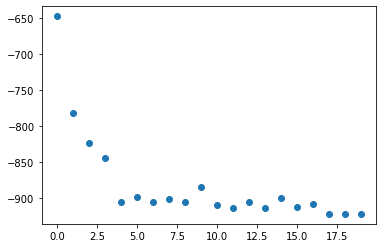

In [218]:
plt.scatter(tsteps,e20)

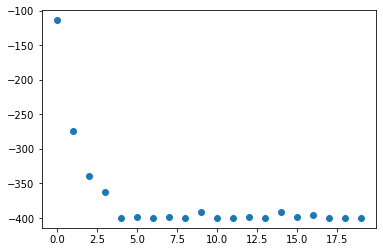

In [219]:
plt.scatter(tsteps,m20)